In [1]:
!pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_v

>1/5 param=1.000000, loss=0.002306
>2/5 param=1.000000, loss=0.001289
>3/5 param=1.000000, loss=0.000670
>4/5 param=1.000000, loss=0.000928
>5/5 param=1.000000, loss=0.002308
>1/5 param=2.000000, loss=0.000245
>2/5 param=2.000000, loss=0.000888
>3/5 param=2.000000, loss=0.000453
>4/5 param=2.000000, loss=0.001440
>5/5 param=2.000000, loss=0.000998
>1/5 param=3.000000, loss=0.009091
>2/5 param=3.000000, loss=0.002086
>3/5 param=3.000000, loss=0.000195
>4/5 param=3.000000, loss=0.003348
>5/5 param=3.000000, loss=0.004555
              1         2         3
count  5.000000  5.000000  5.000000
mean   0.001500  0.000805  0.003855
std    0.000768  0.000471  0.003342
min    0.000670  0.000245  0.000195
25%    0.000928  0.000453  0.002086
50%    0.001289  0.000888  0.003348
75%    0.002306  0.000998  0.004555
max    0.002308  0.001440  0.009091


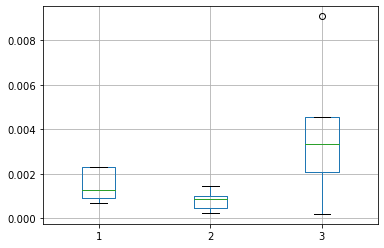

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from pandas import DataFrame
from numpy import array
# return training data
def get_train():
  seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
  seq = array(seq)
  X, y = seq[:, 0], seq[:, 1]
  X = X.reshape((5, 1, 1))
  return X, y

# return validation data
def get_val():
  seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
  seq = array(seq)
  X, y = seq[:, 0], seq[:, 1]
  X = X.reshape((len(X), 1, 1))
  return X, y

# fit an LSTM model
def fit_model(n_batch):
  # define model
  model = Sequential()
  model.add(LSTM(10, input_shape=(1,1)))
  model.add(Dense(1, activation='linear'))
  # compile model
  model.compile(loss='mse', optimizer='adam')
  # fit model
  X,y = get_train()
  history = model.fit(X, y, epochs=500, shuffle=False, verbose=0, batch_size=n_batch)
  # evaluate model
  valX, valY = get_val()
  loss = model.evaluate(valX, valY, verbose=0)
  return loss

# define scope of search
params = [1, 2, 3]
n_repeats = 5
# grid search parameter values
scores = DataFrame()
for value in params:
  # repeat each experiment multiple times
  loss_values = list()
  for i in range(n_repeats):
    loss = fit_model(value)
    loss_values.append(loss)
    print('>%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
  # store results for this parameter
  scores[str(value)] = loss_values
# summary statistics of results
print(scores.describe())
# box and whisker plot of results
scores.boxplot()
pyplot.show()

In [4]:
!pip install --upgrade scipy

   ---------------------------------------- 42.2/42.2 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2


  You can safely remove it manually.
ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\user\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\user\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\us

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor= val_loss , min_delta=100)
model.fit(..., callbacks=[es])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import array
from keras.models import load_model

# return training data
def get_train():
  seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
  seq = array(seq)
  X, y = seq[:, 0], seq[:, 1]
  X = X.reshape((len(X), 1, 1))
  return X, y

# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
X,y = get_train()
model.fit(X, y, epochs=300, shuffle=False, verbose=0)
# save model to single file
model.save('lstm_model.keras')

In [14]:
# snip...
# later, perhaps run from another script
# load model from single file
model = load_model('lstm_model.keras')
# make predictions
yhat = model.predict(X, verbose=0)
print(yhat)

# convert model architecture to JSON format
architecture = model.to_json()
# save architecture to JSON file
with open('architecture.json','wt') as json_file:
  json_file.write(architecture)
# save weights to keras file
model.save_weights('weights.keras')


[[0.24318287]
 [0.27614155]
 [0.30987433]
 [0.34425232]
 [0.37914664]]


In [18]:
from keras.models import model_from_json
# load architecture from JSON File
json_file = open('architecture.json','rt')
architecture = json_file.read()
json_file.close()
# create model from architecture
model = model_from_json(architecture)
# load weights from keras file
model.load_weights('weights.keras')
# make predictions
yhat = model.predict(X, verbose=0)
print(yhat)

[[0.24318287]
 [0.27614155]
 [0.30987433]
 [0.34425232]
 [0.37914664]]
